## Train Model

In [1]:
import os
import logging
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

from SimpleWalk2D import SimpleWalk2DDynGoal

env = SimpleWalk2DDynGoal()

### Train Callback

In [2]:
class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok = True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
            
        return True

In [3]:
env_name = 'SW2DDynGoal'

CHECKPOINT_DIR = './train/train_' + env_name
LOG_DIR = './train/log_' + env_name

callback = TrainAndLoggingCallback(check_freq=10_000, save_path=CHECKPOINT_DIR)

log_path = os.path.join('Training', 'Logs')

model = PPO(
    "MlpPolicy", 
    env, 
    verbose=1, 
    tensorboard_log=log_path,
    learning_rate=0.001,
    n_steps =256
    )
logger.setLevel(logging.INFO)

model.learn(
    total_timesteps=100_000, 
    callback = callback
    )

model.save('PPO')

logger.setLevel(logging.DEBUG)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training/Logs/PPO_5
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17.3     |
|    ep_rew_mean     | -36.1    |
| time/              |          |
|    fps             | 318      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 256      |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 17.4        |
|    ep_rew_mean          | -15.6       |
| time/                   |             |
|    fps                  | 399         |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 512         |
| train/                  |             |
|    approx_kl            | 0.017155109 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.

AttributeError: 'PPO' object has no attribute 'delete'

## Test Model

In [4]:
from stable_baselines3 import PPO
from SimpleWalk2D import SimpleWalk2DDynGoal

env = SimpleWalk2DDynGoal()

model = PPO.load("PPO", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


info {'distance_to_goal': 6.619048, 'steps_taken': 20, 'previous_state': array([10.252838, 16.31609 , 10.770428,  9.408544], dtype=float32), 'new_state': array([10.252838, 16.31609 , 10.770428,  9.408544], dtype=float32)}


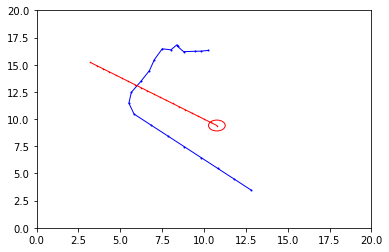

In [5]:

# test prediction
env.reset()

while True:
    action, _states = model.predict(env.state)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
env.render()

In [6]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=10, render=False)

/home/luttkule/anaconda3/envs/rl-test/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(86.75159907341003, 480.76171508880793)